In [1]:
%%HTML
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>

In [1]:
import PySimpleGUI as sg
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
import math
import datetime
import datetime
import util_func

# 既知のバグですが、たまにGUIの表示がいろいろ重なって表示されます。
# なんでもいいのでボタンを押して画面を更新すると治るみたいです。

sg.theme('LightGrey2')

def collapse(layout, key):
    """
    Helper function that creates a Column that can be later made hidden, thus appearing "collapsed"
    :param layout: The layout for the section
    :param key: Key used to make this seciton visible / invisible
    :return: A pinned column that can be placed directly into your layout
    :rtype: sg.pin
    """
    return sg.pin(sg.Column(layout, key=key))

..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



In [2]:
def make_layout_drawing(path,keyname):
    drawing = [
            [sg.Image(path, key=keyname,  size=(400,300))]#size=(800,600)
    ]
    return drawing

In [16]:
def make_kifo_layout():
    # fig
    # kifo
    kifo_kagra_drawing_mi_normalsize = [
                    [sg.Image('../fig/DRFPMI_picture_normal.png', key='kifo_imageContainer1',  size=(400,300))]#size=(800,600)
    ]
    kifo_kagra_drawing_mi_largesize = [
                    [sg.Image('../fig/DRFPMI_picture_large.png',  key='kifo_imageContainer2', size=(800,600))]#size=(800,600)
    ]
    kifo_kagra_drawing_fpmi_normalsize = [
                    [sg.Image('../fig/DRFPMI_picture_normal.png', key='kifo_imageContainer3',  size=(400,300))]#size=(800,600)
    ]
    kifo_kagra_drawing_fpmi_largesize = [
                    [sg.Image('../fig/DRFPMI_picture_large.png',  key='kifo_imageContainer4', size=(800,600))]#size=(800,600)
    ]
    kifo_kagra_drawing_prfpmi_normalsize = [
                    [sg.Image('../fig/DRFPMI_picture_normal.png', key='kifo_imageContainer5',  size=(400,300))]#size=(800,600)
    ]
    kifo_kagra_drawing_prfpmi_largesize = [
                    [sg.Image('../fig/DRFPMI_picture_large.png',  key='kifo_imageContainer6', size=(800,600))]#size=(800,600)
    ]
    kifo_kagra_drawing_drfpmi_normalsize = [
                    [sg.Image('../fig/DRFPMI_picture_normal.png', key='kifo_imageContainer7',  size=(400,300))]#size=(800,600)
    ]
    kifo_kagra_drawing_drfpmi_largesize = [
                    [sg.Image('../fig/DRFPMI_picture_large.png',  key='kifo_imageContainer8', size=(800,600))]#size=(800,600)
    ]
    # kifo
    kifo_drawing_size_buttons =[
                    [sg.Button('normal size', size=(10,1), font=(10), key='kifo_normalize_drawing_size'),
                     sg.Button('Large size',  size=(10,1), font=(10), key='kifo_expand_drawing_size')],
    ]
    #sw_power
    kifo_sec_sw_power_setting = [
                [sg.Text('no advanced settings')],
                ## PDs checkbox
                [sg.Checkbox('REFL', default=True, key='kifo_sw_power_REFL'), sg.Checkbox('AS',   default=True, key='kifo_sw_power_AS'),
                 sg.Checkbox('POP',  default=True, key='kifo_sw_power_POP'),
                 sg.Checkbox('TMSY',default=True, key='kifo_sw_power_TMSY'),  sg.Checkbox('TMSX',default=True, key='kifo_sw_power_TMSX'),
                 sg.Checkbox('POS',  default=True, key='kifo_sw_power_POS')],
                [sg.Checkbox('n0',    key='kifo_sw_power_n0'),
                 sg.Checkbox('n_eo1', key='kifo_sw_power_n_eo1'),sg.Checkbox('n_eo2', key='kifo_sw_power_n_eo2'),
                 sg.Checkbox('n_eo3', key='kifo_sw_power_n_eo3'),sg.Checkbox('n_eo4', key='kifo_sw_power_n_eo4'),],
                [sg.Checkbox('npr1',  key='kifo_sw_power_npr1'), sg.Checkbox('npr2',  key='kifo_sw_power_npr2'),# npr
                 sg.Checkbox('npr3',  key='kifo_sw_power_npr3'), sg.Checkbox('npr4',  key='kifo_sw_power_npr4'),
                 sg.Checkbox('npr5',  key='kifo_sw_power_npr5'), sg.Checkbox('npr6',  key='kifo_sw_power_npr6')],
                [sg.Checkbox('nsr1',  key='kifo_sw_power_nsr1'), sg.Checkbox('nsr2',  key='kifo_sw_power_nsr2'),# nsr
                 sg.Checkbox('nsr3',  key='kifo_sw_power_nsr3'), sg.Checkbox('nsr4',  key='kifo_sw_power_nsr4'),
                 sg.Checkbox('nsr5',  key='kifo_sw_power_nsr5')],
                [sg.Checkbox('n2',    key='kifo_sw_power_n2'),   sg.Checkbox('n3',    key='kifo_sw_power_n3'),# n
                 sg.Checkbox('ny1',   key='kifo_sw_power_ny1'),  sg.Checkbox('nx1',   key='kifo_sw_power_nx1'),
                 sg.Checkbox('ny2',   key='kifo_sw_power_ny2'),  sg.Checkbox('nx2',   key='kifo_sw_power_nx2'),
                 sg.Checkbox('ny3',   key='kifo_sw_power_ny3'),  sg.Checkbox('nx3',   key='kifo_sw_power_nx3')],

                ]
    #tf_power
    kifo_sec_tf_power_setting = [
                [sg.Text('no advanced settings')]
                ]
    #sw_amptd
    amptdlist = ["CR_field", "f1_SB_field_upper", "f1_SB_field_lower", "f2_SB_field_upper", "f2_SB_field_lower"]
    kifo_sec_sw_amptd_setting = [
                # amp detector
                [sg.Text('Select sideband field')],
                [sg.Checkbox('CR field',          key='kifo_put_car_sw_amptd_flag'),
                 sg.Checkbox('f1 SB field upper', key='kifo_put_f1u_sw_amptd_flag'),
                 sg.Checkbox('f1 SB field lower', key='kifo_put_f1l_sw_amptd_flag'),
                 sg.Checkbox('f2 SB field upper', key='kifo_put_f2u_sw_amptd_flag'),
                 sg.Checkbox('f2 SB field lower', key='kifo_put_f2l_sw_amptd_flag')],
                ## PDs checkbox
                [sg.Text('Select port')],
                [sg.Checkbox('REFL', default=True, key='kifo_sw_amptd_REFL'), sg.Checkbox('AS',   default=True, key='kifo_sw_amptd_AS'),
                 sg.Checkbox('POP',  default=True, key='kifo_sw_amptd_POP'),
                 sg.Checkbox('TMSY',default=True, key='kifo_sw_amptd_TMSY'),sg.Checkbox('TMSX',default=True, key='kifo_sw_amptd_TMSX'),
                 sg.Checkbox('POS',  default=True, key='kifo_sw_amptd_POS')],
                [sg.Checkbox('n0',    key='kifo_sw_amptd_n0'),
                 sg.Checkbox('n_eo1', key='kifo_sw_amptd_n_eo1'),sg.Checkbox('n_eo2', key='kifo_sw_amptd_n_eo2'),
                 sg.Checkbox('n_eo3', key='kifo_sw_amptd_n_eo3'),sg.Checkbox('n_eo4', key='kifo_sw_amptd_n_eo4')],
                [sg.Checkbox('npr1',  key='kifo_sw_amptd_npr1'), sg.Checkbox('npr2',  key='kifo_sw_amptd_npr2'),# npr
                 sg.Checkbox('npr3',  key='kifo_sw_amptd_npr3'), sg.Checkbox('npr4',  key='kifo_sw_amptd_npr4'),
                 sg.Checkbox('npr5',  key='kifo_sw_amptd_npr5'), sg.Checkbox('npr6',  key='kifo_sw_amptd_npr6')],
                [sg.Checkbox('nsr1',  key='kifo_sw_amptd_nsr1'), sg.Checkbox('nsr2',  key='kifo_sw_amptd_nsr2'),# nsr
                 sg.Checkbox('nsr3',  key='kifo_sw_amptd_nsr3'), sg.Checkbox('nsr4',  key='kifo_sw_amptd_nsr4'),
                 sg.Checkbox('nsr5',  key='kifo_sw_amptd_nsr5')],
                [sg.Checkbox('n2',    key='kifo_sw_amptd_n2'),   sg.Checkbox('n3',    key='kifo_sw_amptd_n3'),# n
                 sg.Checkbox('ny1',   key='kifo_sw_amptd_ny1'),  sg.Checkbox('nx1',   key='kifo_sw_amptd_nx1'),
                 sg.Checkbox('ny2',   key='kifo_sw_amptd_ny2'),  sg.Checkbox('nx2',   key='kifo_sw_amptd_nx2'),
                 sg.Checkbox('ny3',   key='kifo_sw_amptd_ny3'),  sg.Checkbox('nx3',   key='kifo_sw_amptd_nx3')],
    ]
        
    #sw_dmod1
    dmod_freqlist = ["","DC", "fsb1", "2fsb1", "3fsb1", "fsb2", "2fsb2", "3fsb2"]
    dmod_phaselist = ["", "Iphase", "Qphase", "optimal"]

    sw_dmod1_box = []
    ######
    num = 0
    phase_tooltip = "I:0[deg]\n"+"Q:90[deg]\n"+"optimal:calculate arg(I+iQ) and demodulate signal by using this phase\n"
    for i in range(20):
        num = i+1
        layout_name = "kifo_sw_dmod1_plot_section%s"%str(num)
        exec(
'''
%s =[
[sg.Text("%02d")
,sg.Text('port = ')
,sg.Combo((util_func.get_all_port_list())      , size=(20,1), default_value=util_func.get_all_port_list()[0]      , key='kifo_sw_dmod1_port_combo%s', readonly=True)
,sg.Text('demod freq = ')
,sg.Combo((dmod_freqlist) , size=(20,1), default_value=dmod_freqlist[2] , key='kifo_sw_dmod1_freq_combo%s')
,sg.Text('demod phase = ')
,sg.Combo((dmod_phaselist), size=(20,1), default_value=dmod_phaselist[1], key='kifo_sw_dmod1_phase_combo%s', tooltip=phase_tooltip)]
]
'''%(layout_name, num, str(num), str(num), str(num)))
        
        exec('sw_dmod1_box.append([collapse(kifo_sw_dmod1_plot_section%s, "kifo_sw_dmod1_plot_section%s")])'%(str(num), str(num)))
        #exec('sw_dmod1_box.append([sg.Column(kifo_sw_dmod1_plot_section%s, key="kifo_sw_dmod1_plot_section%s")])'%(str(num), str(num)))
    #####
    kifo_sec_sw_dmod1_setting = [
            #[sg.Text('if select "plot separately", pd results displayed all separately.')],
            #[sg.Radio('overplot selected port output', 'RADIO_sw_dmod1_plot', default=False, key='kDRFPMI_sw_dmod1_overplot', enable_events=True),
             #sg.Radio('plot separately',        'RADIO_sw_dmod1_plot', default=True,  key='kDRFPMI_sw_dmod1_sepaplot', enable_events=True)],
            #[sg.Text('Which phase to plot?')],
            [sg.Text('select "port", "demodulation frequency", "demodulation phase"'), sg.Button('-', button_color=('white', 'black'), key='kifo_sw_dmod1_plotminus'), sg.Button('+', button_color=('white', 'black'), key='kifo_sw_dmod1_plotplus')],
            [collapse(sw_dmod1_box, 'sw_dmod1_box')],
            [sg.Text('select option from list or input number directly')],
            ]
    #tf_dmod2
    dmod_freqlist = ["", "fsb1", "2fsb1", "3fsb1", "fsb2", "2fsb2", "3fsb2"]
    dmod_phaselist = ["", "Iphase", "Qphase", "optimal"]
    tf_dmod2_box = []
    #st_type1
    kifo_sec_st_type1_setting = [
                [sg.Text('no advanced settings')],
                ## PDs checkbox
                [sg.Checkbox('REFL', default=True, key='kifo_st_type1_REFL'), sg.Checkbox('AS',   default=True, key='kifo_st_type1_AS'),
                 sg.Checkbox('POP',  default=True, key='kifo_st_type1_POP'),
                 sg.Checkbox('TMSY',default=True, key='kifo_st_type1_TMSY'),  sg.Checkbox('TMSX',default=True, key='kifo_st_type1_TMSX'),
                 sg.Checkbox('POS',  default=True, key='kifo_st_type1_POS')],
                [sg.Checkbox('n0',    key='kifo_st_type1_n0'),
                 sg.Checkbox('n_eo1', key='kifo_st_type1_n_eo1'),sg.Checkbox('n_eo2', key='kifo_st_type1_n_eo2'),
                 sg.Checkbox('n_eo3', key='kifo_st_type1_n_eo3'),sg.Checkbox('n_eo4', key='kifo_st_type1_n_eo4'),],
                [sg.Checkbox('npr1',  key='kifo_st_type1_npr1'), sg.Checkbox('npr2',  key='kifo_st_type1_npr2'),# npr
                 sg.Checkbox('npr3',  key='kifo_st_type1_npr3'), sg.Checkbox('npr4',  key='kifo_st_type1_npr4'),
                 sg.Checkbox('npr5',  key='kifo_st_type1_npr5'), sg.Checkbox('npr6',  key='kifo_st_type1_npr6')],
                [sg.Checkbox('nsr1',  key='kifo_st_type1_nsr1'), sg.Checkbox('nsr2',  key='kifo_st_type1_nsr2'),# nsr
                 sg.Checkbox('nsr3',  key='kifo_st_type1_nsr3'), sg.Checkbox('nsr4',  key='kifo_st_type1_nsr4'),
                 sg.Checkbox('nsr5',  key='kifo_st_type1_nsr5')],
                [sg.Checkbox('n2',    key='kifo_st_type1_n2'),   sg.Checkbox('n3',    key='kifo_st_type1_n3'),# n
                 sg.Checkbox('ny1',   key='kifo_st_type1_ny1'),  sg.Checkbox('nx1',   key='kifo_st_type1_nx1'),
                 sg.Checkbox('ny2',   key='kifo_st_type1_ny2'),  sg.Checkbox('nx2',   key='kifo_st_type1_nx2'),
                 sg.Checkbox('ny3',   key='kifo_st_type1_ny3'),  sg.Checkbox('nx3',   key='kifo_st_type1_nx3')],

                ]
    ######
    num = 0
    phase_tooltip = "I:0[deg]\n"+"Q:90[deg]\n"+"optimal:calculate arg(I+iQ) and demodulate signal by using this phase\n"
    for i in range(20):
        num = i+1
        layout_name = "kifo_tf_dmod2_plot_section%s"%str(num)
        exec(
'''
%s =[
[sg.Text("%s")
,sg.Text('port = ')
,sg.Combo((util_func.get_all_port_list())      , size=(20,1), default_value=util_func.get_all_port_list()[0]      , key='kifo_tf_dmod2_port_combo%s', readonly=True)
,sg.Text('demod freq = ')
,sg.Combo((dmod_freqlist) , size=(20,1), default_value=dmod_freqlist[1] , key='kifo_tf_dmod2_freq_combo%s')
,sg.Text('demod phase = ')
,sg.Combo((dmod_phaselist), size=(20,1), default_value=dmod_phaselist[1], key='kifo_tf_dmod2_phase_combo%s', tooltip=phase_tooltip)]
]
'''%(layout_name, str(num), str(num), str(num), str(num)))
        
        exec('tf_dmod2_box.append([collapse(kifo_tf_dmod2_plot_section%s, "kifo_tf_dmod2_plot_section%s")])'%(str(num), str(num)))
    #####
    kifo_sec_tf_dmod2_setting = [
    
            #[sg.Text('if select "plot separately", pd results displayed all separately.')],
            #[sg.Radio('overplot selected port output', 'RADIO_sw_dmod2_plot', default=False, key='kDRFPMI_sw_dmod2_overplot', enable_events=True),
             #sg.Radio('plot separately'              , 'RADIO_sw_dmod2_plot', default=True,  key='kDRFPMI_sw_dmod2_sepaplot', enable_events=True)],
            #[sg.Text('Which phase to plot?')],
            [sg.Text('select "demodulation frequency", "demodulation phase", "port"')],
            [sg.Text('select option from list or input number directly'), sg.Button('-', button_color=('white', 'black'), key='kifo_tf_dmod2_plotminus'), sg.Button('+', button_color=('white', 'black'), key='kifo_tf_dmod2_plotplus')],
            
            [collapse(tf_dmod2_box, "tf_dmod2_box")],
            
            ]
            
    #section
    kifo_sec_sw_setting = [

            [sg.Text('Select PD type.')],
            [sg.Radio('Power detector [W]'       , 'kifo_sw_RADIO', default=True  , key='kifo_issw_power', enable_events=True),
             sg.Radio('Amplitud detector'        , 'kifo_sw_RADIO', default=False , key='kifo_issw_amptd', enable_events=True),
             sg.Radio('Demodulated signal [A.U.]', 'kifo_sw_RADIO', default=False , key='kifo_issw_dmod1', enable_events=True)],

            ### pd0_setting_section
            [collapse(kifo_sec_sw_power_setting, 'kifo_sec_sw_power_setting')],
            ### amplitude
            [collapse(kifo_sec_sw_amptd_setting, 'kifo_sec_sw_amptd_setting')],
            ### pd1_settnig_section
            [collapse(kifo_sec_sw_dmod1_setting, 'kifo_sec_sw_dmod1_setting')]

                ]
    kifo_sec_tf_setting = [
    
            [sg.Text('Select PD type.')],
            [#sg.Radio('Power detector [W]', 'kifo_tf_RADIO', default=False,  key='kifo_istf_power', enable_events=True),
             #sg.Radio('Amplitud detector',  'kifo_tf_RADIO', default=False, key='kifo_istf_amptd', enable_events=True),
             sg.Radio('Demodulated signal',  'kifo_tf_RADIO', default=True, key='kifo_istf_dmod2', enable_events=True)],

            ### pd2_setting_section
            [collapse(kifo_sec_tf_power_setting, 'kifo_sec_tf_power_setting')],
            ### amplitude
            #[collapse(kifo_sec_tf_amptd_setting, 'kifo_sec_tf_amptd_setting')],
            ### pd2_setting_section
            [collapse(kifo_sec_tf_dmod2_setting, 'kifo_sec_tf_dmod2_setting')]
    
            ]
    kifo_sec_st_setting = [

            [sg.Text('Select PD type.')],
            [#sg.Radio('Power detector [W]'       , 'kifo_sw_RADIO', default=False  , key='kifo_issw_power', enable_events=True),
             #sg.Radio('Amplitud detector'        , 'kifo_sw_RADIO', default=False , key='kifo_issw_amptd', enable_events=True),
             sg.Radio('qnoisedS(test)', 'kifo_st_RADIO', default=True , key='kifo_isst_type1', enable_events=True)],

            ### pd0_setting_section
            [collapse(kifo_sec_st_type1_setting, 'kifo_sec_st_type1_setting')],
            ### amplitude
            #[collapse(kifo_sec_sw_amptd_setting, 'kifo_sec_sw_amptd_setting')],
            ### pd1_settnig_section
            #[collapse(kifo_sec_sw_dmod1_setting, 'kifo_sec_sw_dmod1_setting')]

                ]

    dof_selection_menu = [
            [sg.Text('　　DoF'),sg.Combo(('DARM', 'CARM', 'BS', 'PRCL', 'SRCL'), size=(20,1), default_value='DARM', readonly=True, key='kifo_dof')], #sg.comboを使う時にはサイズを指定するべき
    ]
    sweep_phase_mirror_menu = [
            [sg.Text('　　Mirror name'),sg.Combo(('PRM', 'SRM'), size=(20,1), default_value='SRM', readonly=True, key='kifo_phase_sweep_mirror')], #sg.comboを使う時にはサイズを指定するべき
    ]

    # drawing
    layout_drawing = make_layout_drawing('../fig/DRFPMI_picture_normal.png', "layout_drawing_key")

    #screen
    kifo_layout = [
    # figure
    [collapse(layout_drawing, 'layout_drawing')],
    ### select section sw or tf / power, dmod1 or dmod2
    [sg.Text('1. Select simulation mode.', font=('default',20))],
    [sg.Radio('Sweep',             'kifo_sim_mode', default=True,  key='kifo_issw', enable_events=True),
     sg.Radio('Transfer function', 'kifo_sim_mode', default=False, key='kifo_istf', enable_events=True),
     sg.Radio('Sensitivity', 'kifo_sim_mode', default=False, key='kifo_isst', enable_events=True)],

    [collapse(kifo_sec_sw_setting, 'kifo_sec_sw_setting')],
    [collapse(kifo_sec_tf_setting, 'kifo_sec_tf_setting')],
    [collapse(kifo_sec_st_setting, 'kifo_sec_st_setting')],

    # 2 DoF or Mirror phase sweep
    [sg.Text('2. Select which DoF to move', font=('default',20), key="kifo_selection2_text")],
    [sg.Radio('DoF', 'kifo_xaxis_command_type', default=True  , key='kifo_dof_selection', enable_events=True),
    #sg.Radio('phase sweep mirror' , 'kifo_xaxis_command_type', default=False , key='kifo_sweep_phase_mirror_selection', enable_events=True)
    ],
    # DoF selection
    [collapse(dof_selection_menu, 'dof_selection_menu')],
    # Mirror Phase Sweep Selection
    [collapse(sweep_phase_mirror_menu, 'sweep_phase_mirror_menu')],
    # plot button
    [sg.Button('Plot', button_color=('white', 'black'), key='kifo_event')]
    ]
    return kifo_layout

In [17]:
def make_extra_ifo_param_tab():

    mirror_sec_bs = [
            [sg.Text('BS   mirror power transmittance'), sg.Input(key='k_inf_c_mibs_mirror_transmittance', default_text='0.5'     , enable_events=True)],
            [sg.Text('BS   mirror power loss'),          sg.Input(key='k_inf_c_mibs_mirror_loss'         , default_text='0'       , enable_events=True)],
            [sg.Checkbox('load mirror map file?'                , key='k_inf_c_mirror_sec_isload_mirror_map_bs', enable_events=True)],
            ]
    
    mirror_sec_itmx = [
            [sg.Text('ITMX mirror power transmittance'), sg.Input(key='k_inf_c_itmx_mirror_transmittance', default_text='0.004'   , enable_events=True)],
            [sg.Text('ITMX mirror power loss'),          sg.Input(key='k_inf_c_itmx_mirror_loss'         , default_text='0'       , enable_events=True)],
            [sg.Checkbox('load mirror map file?',                 key='k_inf_c_mirror_sec_isload_mirror_map_itmx', enable_events=True)],
            ]
    mirror_sec_itmy = [
            [sg.Text('ITMY mirror power transmittance'), sg.Input(key='k_inf_c_itmy_mirror_transmittance', default_text='0.004'   , enable_events=True)],
            [sg.Text('ITMY mirror power loss'),          sg.Input(key='k_inf_c_itmy_mirror_loss'         , default_text='45e-6'       , enable_events=True)]
            ]
    mirror_sec_etmx = [
            [sg.Text('ETMX mirror power transmittance'), sg.Input(key='k_inf_c_etmx_mirror_transmittance', default_text='5e-06'   , enable_events=True)],
            [sg.Text('ETMX mirror power loss'),          sg.Input(key='k_inf_c_etmx_mirror_loss'         , default_text='0'       , enable_events=True)]
            ]
    mirror_sec_etmy = [
            [sg.Text('ETMY mirror power transmittance'), sg.Input(key='k_inf_c_etmy_mirror_transmittance', default_text='5e-06'   , enable_events=True)],
            [sg.Text('ETMY mirror power loss'),          sg.Input(key='k_inf_c_etmy_mirror_loss'         , default_text='0'       , enable_events=True)]
            ]
    
    mirror_sec_prm = [
            [sg.Text('PRM  mirror power transmittance'), sg.Input(key='k_inf_c_prm_mirror_transmittance' , default_text='0.1'     , enable_events=True)],
            [sg.Text('PRM  mirror power loss'),          sg.Input(key='k_inf_c_prm_mirror_loss'          , default_text='45e-6'   , enable_events=True)]
            ]
    mirror_sec_pr2 = [
            [sg.Text('PR2  mirror power transmittance'), sg.Input(key='k_inf_c_pr2_mirror_transmittance' , default_text='500e-6'  , enable_events=True)],
            [sg.Text('PR2  mirror power loss'),          sg.Input(key='k_inf_c_pr2_mirror_loss'          , default_text='45e-6'  , enable_events=True)]
            ]
    mirror_sec_pr3 = [
            [sg.Text('PR3  mirror power transmittance'), sg.Input(key='k_inf_c_pr3_mirror_transmittance' , default_text='50e-6'   , enable_events=True)],
            [sg.Text('PR3  mirror power loss'),          sg.Input(key='k_inf_c_pr3_mirror_loss'          , default_text='45e-6'   , enable_events=True)]
            ]

    mirror_sec_srm = [
            [sg.Text('SRM  mirror power transmittance'), sg.Input(key='k_inf_c_srm_mirror_transmittance' , default_text='0.3'     , enable_events=True)],
            [sg.Text('SRM  mirror power loss'),          sg.Input(key='k_inf_c_srm_mirror_loss'          , default_text='45e-6'   , enable_events=True)]
            ]
    mirror_sec_sr2 = [
            [sg.Text('SR2  mirror power transmittance'), sg.Input(key='k_inf_c_sr2_mirror_transmittance' , default_text='500e-6'  , enable_events=True)],
            [sg.Text('SR2  mirror power loss'),          sg.Input(key='k_inf_c_sr2_mirror_loss'          , default_text='45e-6'  , enable_events=True)]
            ]
    mirror_sec_sr3 = [
            [sg.Text('SR3  mirror power transmittance'), sg.Input(key='k_inf_c_sr3_mirror_transmittance' , default_text='50e-6'   , enable_events=True)],
            [sg.Text('SR3  mirror power loss'),          sg.Input(key='k_inf_c_sr3_mirror_loss'          , default_text='45e-6'   , enable_events=True)]
            ]

    mirror_param_sec = [
        [sg.Text('note: Reflectance and transmittance are values between 0 and 1.')],
        [sg.Checkbox('BS'  , key='k_inf_c_open_mirror_param_sec_bs'  , enable_events=True)],
        [collapse(mirror_sec_bs,   'mirror_param_sec_bs')],
        [sg.Checkbox('ITMX', key='k_inf_c_open_mirror_param_sec_itmx', enable_events=True)],
        [collapse(mirror_sec_itmx, 'mirror_param_sec_itmx')],
        [sg.Checkbox('ITMY', key='k_inf_c_open_mirror_param_sec_itmy', enable_events=True)],
        [collapse(mirror_sec_itmy, 'mirror_param_sec_itmy')],
        [sg.Checkbox('ETMX', key='k_inf_c_open_mirror_param_sec_etmx', enable_events=True)],
        [collapse(mirror_sec_etmx, 'mirror_param_sec_etmx')],
        [sg.Checkbox('ETMY', key='k_inf_c_open_mirror_param_sec_etmy', enable_events=True)],
        [collapse(mirror_sec_etmy, 'mirror_param_sec_etmy')],
        [sg.Checkbox('PRM', key='k_inf_c_open_mirror_param_sec_prm'  , enable_events=True)],
        [collapse(mirror_sec_prm,  'mirror_param_sec_prm')],
        [sg.Checkbox('SRM', key='k_inf_c_open_mirror_param_sec_srm'  , enable_events=True)],
        [collapse(mirror_sec_srm,  'mirror_param_sec_srm')],
        [sg.Checkbox('PR2', key='k_inf_c_open_mirror_param_sec_pr2'  , enable_events=True)],
        [collapse(mirror_sec_pr2,  'mirror_param_sec_pr2')],
        [sg.Checkbox('PR3', key='k_inf_c_open_mirror_param_sec_pr3'  , enable_events=True)],
        [collapse(mirror_sec_pr3,  'mirror_param_sec_pr3')],
        [sg.Checkbox('SR2', key='k_inf_c_open_mirror_param_sec_sr2'  , enable_events=True)],
        [collapse(mirror_sec_sr2,  'mirror_param_sec_sr2')],
        [sg.Checkbox('SR3', key='k_inf_c_open_mirror_param_sec_sr3'  , enable_events=True)],
        [collapse(mirror_sec_sr3,  'mirror_param_sec_sr3')]
        ]
    hom_combo = []
    for i in range(100):
        hom_combo.append("%d"%i)


    hom_param_sec = [
        [sg.Checkbox('use high order mode beam?', key='k_inf_c_laser_use_hom' , default=False, enable_events=True)],
        [sg.Text('number of higher mode order'), sg.Combo((hom_combo), default_value='1', readonly=True, disabled=True, key='k_inf_c_num_of_hom_order', enable_events=True)]
    ]
    laser_param_sec = [    
        [sg.Text('laser_power [W]'), sg.Input(key='k_inf_c_laser_power' ,default_text='1' ,enable_events=True)]
    ]
    
    eom_param_sec = [
        [sg.Text('modulation f1 frequency'),                 sg.Input(key='k_inf_c_f1_mod_frequency'        , default_text='16.881M' , enable_events=True)],
        [sg.Text('f1 modulation index', visible=False),      sg.Input(key='k_inf_c_f1_mod_index'            , default_text='0.3'     , enable_events=True, visible=False)],# 必要なさそうなので表示していません
        [sg.Text('modulation f2 frequency'),                 sg.Input(key='k_inf_c_f2_mod_frequency'        , default_text='45.0159M', enable_events=True)],
        [sg.Text('f2 modulation index', visible=False),      sg.Input(key='k_inf_c_f2_mod_index'            , default_text='0.3'     , enable_events=True, visible=False)],# 必要なさそうなので表示していません
        [sg.Text('number of produced modulator sidebands'), sg.Combo(('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'), default_value='3', readonly=True, key='k_inf_c_num_of_sidebands', enable_events=True)]
                
    ]
    # kifo
    kifo_kagra_drawing_para_mi_normalsize = [
                    [sg.Image('../fig/DRFPMI_picture_normal.png', key='kifo_imageContainer_para1',  size=(400,300))]#size=(800,600)
    ]
    kifo_kagra_drawing_para_mi_largesize = [
                    [sg.Image('../fig/DRFPMI_picture_large.png',  key='kifo_imageContainer_para2', size=(800,600))]#size=(800,600)
    ]
    kifo_kagra_drawing_para_fpmi_normalsize = [
                    [sg.Image('../fig/DRFPMI_picture_normal.png', key='kifo_imageContainer_para3',  size=(400,300))]#size=(800,600)
    ]
    kifo_kagra_drawing_para_fpmi_largesize = [
                    [sg.Image('../fig/DRFPMI_picture_large.png',  key='kifo_imageContainer_para4', size=(800,600))]#size=(800,600)
    ]
    kifo_kagra_drawing_para_prfpmi_normalsize = [
                    [sg.Image('../fig/DRFPMI_picture_normal.png', key='kifo_imageContainer_para5',  size=(400,300))]#size=(800,600)
    ]
    kifo_kagra_drawing_para_prfpmi_largesize = [
                    [sg.Image('../fig/DRFPMI_picture_large.png',  key='kifo_imageContainer_para6', size=(800,600))]#size=(800,600)
    ]
    kifo_kagra_drawing_para_drfpmi_normalsize = [
                    [sg.Image('../fig/DRFPMI_picture_normal.png', key='kifo_imageContainer_para7',  size=(400,300))]#size=(800,600)
    ]
    kifo_kagra_drawing_para_drfpmi_largesize = [
                    [sg.Image('../fig/DRFPMI_picture_large.png',  key='kifo_imageContainer_para8', size=(800,600))]#size=(800,600)
    ]

    para_drawing = make_layout_drawing('../fig/DRFPMI_picture_normal.png', "para_drawing_key")

    length_param_sec = [
        [collapse(para_drawing, 'para_drawing')],
        #[collapse(kifo_kagra_drawing_para_mi_normalsize,     'kifo_kagra_drawing_para_mi_normalsize')],
        #[collapse(kifo_kagra_drawing_para_mi_largesize,      'kifo_kagra_drawing_para_mi_largesize')],
        #[collapse(kifo_kagra_drawing_para_fpmi_normalsize,   'kifo_kagra_drawing_para_fpmi_normalsize')],
        #[collapse(kifo_kagra_drawing_para_fpmi_largesize,    'kifo_kagra_drawing_para_fpmi_largesize')],
        #[collapse(kifo_kagra_drawing_para_prfpmi_normalsize, 'kifo_kagra_drawing_para_prfpmi_normalsize')],
        #[collapse(kifo_kagra_drawing_para_prfpmi_largesize,  'kifo_kagra_drawing_para_prfpmi_largesize')],
        #[collapse(kifo_kagra_drawing_para_drfpmi_normalsize, 'kifo_kagra_drawing_para_drfpmi_normalsize')],
        #[collapse(kifo_kagra_drawing_para_drfpmi_largesize,  'kifo_kagra_drawing_para_drfpmi_largesize')],
        [sg.Text('length PRM-PR2'),sg.Input(key='k_inf_c_length_prm_pr2' ,default_text='1' ,enable_events=True)],
        [sg.Text('length PR2-PR3'),sg.Input(key='k_inf_c_length_pr2_pr3' ,default_text='1' ,enable_events=True)],
        [sg.Text('length PR3-BS'),sg.Input(key='k_inf_c_length_pr3_bs' ,default_text='1' ,enable_events=True)],

        [sg.Text('length BS-ITMX'),sg.Input(key='k_inf_c_length_bs_itmx' ,default_text='1' ,enable_events=True)],
        [sg.Text('length ITMX-ETMX'),sg.Input(key='k_inf_c_length_itmx_etmx' ,default_text='1' ,enable_events=True)],
        [sg.Text('length BS-ITMY'),sg.Input(key='k_inf_c_length_bs_itmy' ,default_text='1' ,enable_events=True)],
        [sg.Text('length ITMY-ETMY'),sg.Input(key='k_inf_c_length_itmy_etmy' ,default_text='1' ,enable_events=True)],


        [sg.Text('length SRM-SR2'),sg.Input(key='k_inf_c_length_srm_sr2' ,default_text='1' ,enable_events=True)],
        [sg.Text('length SR2-SR3'),sg.Input(key='k_inf_c_length_sr2_sr3' ,default_text='1' ,enable_events=True)],
        [sg.Text('length SR3-BS'),sg.Input(key='k_inf_c_length_sr3_bs' ,default_text='1' ,enable_events=True)],
    ]
    extra_ifo_param_tab =  [
                    # default button
                    [sg.Button('KAGRA', button_color=('white', 'black'), key='default_setting_kagra')],
                    # plot button
                    [sg.Button('Michelson', button_color=('white', 'black'), key='kifo_interferometrer_mi')
                    ,sg.Button('FPMI'     , button_color=('white', 'black'), key='kifo_interferometrer_fpmi')
                    ,sg.Button('PRFPMI'   , button_color=('white', 'black'), key='kifo_interferometrer_prfpmi')
                    ,sg.Button('DRFPMI'   , button_color=('white', 'black'), key='kifo_interferometrer_drfpmi')],
                    # lather settings
                    [sg.Button('▽', size=(2,1),button_color=('white', 'black'), key='k_inf_c_open_laser_param_sec'),sg.Text('laser parameter')],
                    [collapse(laser_param_sec,  'laser_param_sec')],
                    # mirror param
                    [sg.Button('▽', size=(2,1),button_color=('white', 'black'), key='k_inf_c_open_mirror_param_sec'),sg.Text('mirror parameter')],
                    [collapse(mirror_param_sec,  'mirror_param_sec')],
                    # length param
                    [sg.Button('▽', size=(2,1),button_color=('white', 'black'), key='k_inf_c_open_length_param_sec'),sg.Text('length parameter')],
                    [collapse(length_param_sec,  'length_param_sec')],
                    # EOM param
                    [sg.Button('▽', size=(2,1),button_color=('white', 'black'), key='k_inf_c_open_eom_param_sec'),sg.Text('eom parameter')],
                    [collapse(eom_param_sec,  'eom_param_sec')],
                    # HOM param
                    [sg.Button('▽', size=(2,1),button_color=('white', 'black'), key='k_inf_c_open_hom_param_sec'),sg.Text('hom parameter')],
                    [collapse(hom_param_sec, 'hom_param_sec')],
                    # future task
                    ]
    return extra_ifo_param_tab

now added PDs
% Generated by PyKat 01.12.2020 15:05:37

l i1 1.0 0.0 0.0 n0
s s_eo0 0.0 n0 n_eo1
mod eom1 16881000.0 0.3 3 pm 0.0 n_eo1 n_eo2
s s_eo1 0.0 n_eo2 n_eo3
mod eom2 45015900.0 0.3 3 pm 0.0 n_eo3 n_eo4
s s_eo2 0.0 n_eo4 REFL
m PRM 0.8999550000000001 0.1 0.0 REFL npr1
s sLpr1 14.7615 npr1 npr2
bs PR2 0.9994550000000001 0.0005 0.0 0.686 npr3 npr2 POP POP2
s sLpr2 11.0661 npr3 npr4
bs PR3 0.999905 5e-05 0.0 0.686 dump dump npr4 npr5
s sLpr3 15.7638 npr5 npr6
bs bs1 0.5 0.5 0.0 45.0 npr6 n2 n3 n4
s lx 26.6649 n3 nx1
s ly 23.3351 n2 ny1
m ITMX 0.995955 0.004 0.0 nx1 nx2
s sx1 3000.0 nx2 nx3
m ETMX 0.99995 5e-06 0.0 nx3 TMSX
m ITMY 0.995955 0.004 90.0 ny1 ny2
s sy1 3000.0 ny2 ny3
m ETMY 0.99995 5e-06 90.0 ny3 TMSY
s sLsr3 14.7412 n4 nsr5
bs SR3 0.999905 5e-05 0.0 0.686 nsr5 nsr4 dump dump
s sLsr2 11.1115 nsr4 nsr3
bs SR2 0.9994550000000001 0.0005 0.0 0.686 nsr2 nsr3 POS dump
s sLsr1 15.7386 nsr2 nsr1
m SRM 0.8463550000000001 0.1536 0.0 nsr1 AS
xaxis sig1 f lin -180 180 1000
qnoisedS

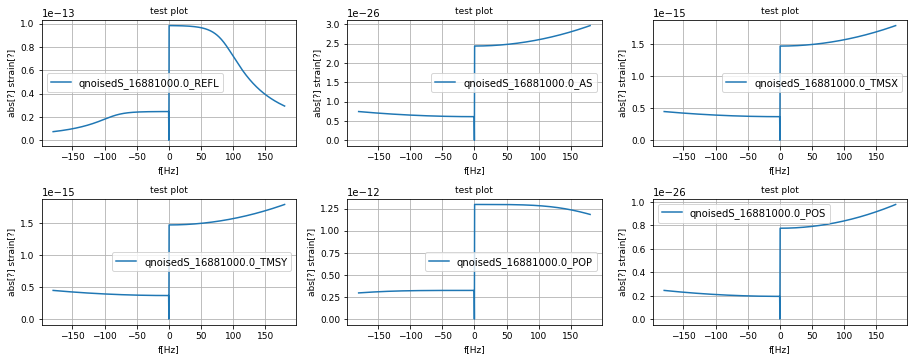

now added PDs
% Generated by PyKat 01.12.2020 15:05:59

l i1 1.0 0.0 0.0 n0
s s_eo0 0.0 n0 n_eo1
mod eom1 16881000.0 0.3 3 pm 0.0 n_eo1 n_eo2
s s_eo1 0.0 n_eo2 n_eo3
mod eom2 45015900.0 0.3 3 pm 0.0 n_eo3 n_eo4
s s_eo2 0.0 n_eo4 REFL
m PRM 0.8999550000000001 0.1 0.0 REFL npr1
attr PRM Rcx -458.1285
attr PRM Rcy -458.1285
s sLpr1 14.7615 npr1 npr2
bs PR2 0.9994550000000001 0.0005 0.0 0.686 npr3 npr2 POP POP2
attr PR2 Rcx -3.0764
attr PR2 Rcy -3.0764
s sLpr2 11.0661 npr3 npr4
bs PR3 0.999905 5e-05 0.0 0.686 dump dump npr4 npr5
attr PR3 Rcx -24.9165
attr PR3 Rcy -24.9165
s sLpr3 15.7638 npr5 npr6
bs bs1 0.5 0.5 0.0 45.0 npr6 n2 n3 n4
attr bs1 Rcx 0.0
attr bs1 Rcy 0.0
s lx 26.4018 n3 nitx1
s ly 23.072 n2 nity1
m ITMX 0.995955 0.004 0.0 nx1 nx2
attr ITMX Rcx -1900.0
attr ITMX Rcy -1900.0
s sx1 3000.0 nx2 nx3
m ETMX 0.99995 5e-06 0.0 nx3 netx1
attr ETMX Rcx 1900.0
attr ETMX Rcy 1900.0
m ITMY 0.995955 0.004 90.0 ny1 ny2
attr ITMY Rcx -1900.0
attr ITMY Rcy -1900.0
s sy1 3000.0 ny2 ny3
m ETMY 0

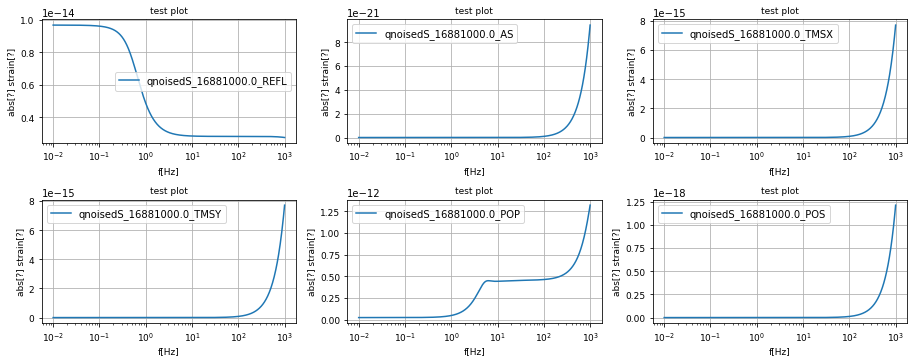

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/koyamanaoki/opt/anaconda3/envs/finesse/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/Users/koyamanaoki/opt/anaconda3/envs/finesse/lib/python3.8/tkinter/__init__.py", line 3525, in set
    self.tk.call(self._w, 'set', first, last)
_tkinter.TclError: invalid command name ".!toplevel11.!frame.!tkscrollableframe.!scrollbar"
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/koyamanaoki/opt/anaconda3/envs/finesse/lib/python3.8/tkinter/__init__.py", line 1883, in __call__
    return self.func(*args)
  File "/Users/koyamanaoki/opt/anaconda3/envs/finesse/lib/python3.8/tkinter/__init__.py", line 3525, in set
    self.tk.call(self._w, 'set', first, last)
_tkinter.TclError: invalid command name ".!toplevel11.!frame.!tkscrollableframe.!scrollbar"


In [21]:
#
kifo_layout         = make_kifo_layout()
extra_ifo_param_tab = make_extra_ifo_param_tab()
additional_option_tab = [
                    # output
                    [sg.Text('Which data you output?')],
                    [sg.Checkbox('kat file',  key='k_inf_c_output_kat'),
                     sg.Checkbox('plot data', key='k_inf_c_output_plotdata')]
]   
L1 = [
    # Tab Group
    [sg.TabGroup(
        [
            [
                sg.Tab('DRFPMI', kifo_layout),
                sg.Tab('IFO_param', extra_ifo_param_tab),
                sg.Tab('OPTION', additional_option_tab),
            ]
        ], enable_events=True, key="kselected_tab")],
    # plot configuration
    [sg.Text('sampling num'), sg.Input(key='k_inf_c_samplingnum', default_text='1000', enable_events=True)],

    # xaxis range
    [sg.Radio('xaxis lin', 'x_plotscale', default=True,  key='k_inf_c_xaxis_lin', enable_events=True),
    sg.Radio('xaxis log', 'x_plotscale', default=False, key='k_inf_c_xaxis_log', enable_events=True)],
    #yaxis range
    [sg.Radio('yaxis lin', 'y_plotscale', default=True,  key='k_inf_c_yaxis_lin', enable_events=True),
    sg.Radio('yaxis log', 'y_plotscale', default=False, key='k_inf_c_yaxis_log', enable_events=True)],

    # xaxis range
    [sg.Text('xaxis range', key='k_inf_c_xaxis_range_text')],
    [sg.Input(key='k_inf_c_xaxis_range_beg', default_text='-180', enable_events=True),
     sg.Text('to'),
     sg.Input(key='k_inf_c_xaxis_range_end', default_text= '180', enable_events=True)],
    
    # その他ボタン
    #[sg.Checkbox('overplot All PDs', key='k_inf_c_is_overplot_all_pds')]
]
layout = [
    [sg.Frame("",L1, key="layoutkey")]#作成したGUIを枠線で囲む
] 
col = [
    [sg.Column(layout, key="colkey", scrollable=True, vertical_scroll_only=True)]#枠戦で囲んだGUIをスクロールできるようにする
]


window = sg.Window('finesse GUI', col, default_element_size=(15,1), finalize=True, size=(900,900), resizable=True, auto_size_text=True)

##############################################################
initialization = False# GUIを立ち上げた一番最初だけ実行するための変数
type_of_pd_signal = 'sw_power'# Pdの信号の検出の方法 sw_power/sw_amptd/sw_dmod1/tf_power/tf_amptd/tf_dmod2
window['kselected_tab'].expand(expand_x=True)# tabの中にあるオブジェクトのサイズに応じてtabのサイズを横幅いっぱいになるように変更する
window['layoutkey'].expand(expand_x=True)# 枠で囲ったGUIのサイズに応じて枠のサイズを幅いっぱいになるように変更する
window['sw_dmod1_box'].expand(expand_y=False)
#shrink=True
sw_dmod1_plotnum = 1
sw_dmod1_plotnum_max = 20
tf_dmod2_plotnum = 1
tf_dmod2_plotnum_max = 20
interferometer   = "DRFPMI"
base_name = "kagra"
drawingsize = "normalsize"
def all_sw_dmod1_box_close(dmod1_plotnum_max):
    for num in range(dmod1_plotnum_max):
        i = num+1
        window["kifo_sw_dmod1_plot_section%s"%str(i)].update(False)
    window["kifo_sw_dmod1_plot_section1"].update(True)
def all_tf_dmod2_box_close(dmod2_plotnum_max):
    for num in range(dmod2_plotnum_max):
        i = num+1
        window["kifo_tf_dmod2_plot_section%s"%str(i)].update(False)
    window["kifo_tf_dmod2_plot_section1"].update(True)
def disable_all_section(window):
    tmp = "ifo"
    all_section = [
        "k%s_sec_sw_setting"%tmp,
        "k%s_sec_tf_setting"%tmp,
        "k%s_sec_st_setting"%tmp,
        "k%s_sec_sw_power_setting"%tmp,
        "k%s_sec_sw_amptd_setting"%tmp,
        "k%s_sec_sw_dmod1_setting"%tmp,
        "k%s_sec_tf_power_setting"%tmp,
        #"k%s_sec_tf_amptd_setting"%tmp,
        "k%s_sec_tf_dmod2_setting"%tmp,
        "k%s_sec_st_type1_setting"%tmp
                  ]
    for key in all_section:
        window[key].update(False)
def mirror_sec_condition(condition, mirrorname="mirror_param_sec_itmx", close_all=False):
    if close_all==True:
        mirrorname_list = [
            "bs", 
            "itmx", "itmy", "etmx", "etmy", 
            "prm", "pr2", "pr3", 
            "srm", "sr2", "sr3"
        ]
        mirrorname_list = [
            "mirror_param_sec_bs", 
            "mirror_param_sec_itmx", "mirror_param_sec_itmy", "mirror_param_sec_etmx", "mirror_param_sec_etmy", 
            "mirror_param_sec_prm", "mirror_param_sec_pr2", "mirror_param_sec_pr3", 
            "mirror_param_sec_srm", "mirror_param_sec_sr2", "mirror_param_sec_sr3"
        ]
        for mirrorname in mirrorname_list:
            window[mirrorname].update(False)
    else:
        window[mirrorname].update(condition)
param_sec ={
    "laser":False,
    "mirror":False,
    "eom":False,
    "length":False,
    "hom":False
}
param_sec_variables_opened  = [False  , False   ,False]
mirrorname_list = [
        "bs", 
        "itmx", "itmy", "etmx", "etmy", 
        "prm", "pr2", "pr3", 
        "srm", "sr2", "sr3"
    ]
def initialize():
    window["kifo_sec_sw_setting"].update(False)
    window["kifo_sec_tf_setting"].update(False)
    window["kifo_sec_st_setting"].update(False)
    window["kifo_sec_sw_power_setting"].update(False)
    window["kifo_sec_tf_power_setting"].update(False)
    window["kifo_sec_st_type1_setting"].update(False)
    window["dof_selection_menu"].update(True)
    window["sweep_phase_mirror_menu"].update(False)
    all_sw_dmod1_box_close(sw_dmod1_plotnum_max)
    all_tf_dmod2_box_close(tf_dmod2_plotnum_max)
    for name in param_sec.keys():
        window["%s_param_sec"%name].update(False)
    mirror_sec_condition(False, "all", True)

initialize()
event, values = window.read()
while True:
    # GUIを立ち上げた時に一度だけ実行する
    if(initialization==False):
        initialize()
        util_func.change_default_optical_parameter(values, window, "kagra")
        #util_func.change_drawing("kagra", "drfpmi", "normalsize", window)
        initialization = True
        
    event, values = window.read()
    # close button
    if event == sg.WIN_CLOSED:
        break
    if event == "k_inf_c_xaxis_log":
        window["k_inf_c_xaxis_range_beg"].update(value="0.01")
        window["k_inf_c_xaxis_range_end"].update(value="1000")
    if event == "k_inf_c_xaxis_lin":
        window["k_inf_c_xaxis_range_beg"].update(value="-180")
        window["k_inf_c_xaxis_range_end"].update(value="180")
    # これです　HOM
    if event == "k_inf_c_laser_use_hom":
        if values["k_inf_c_laser_use_hom"]:
            window["k_inf_c_num_of_hom_order"].update(disabled=False)
        else:
            window["k_inf_c_num_of_hom_order"].update(disabled=True)
    if event == "default_setting_kagra":
        base_name = "kagra"
        util_func.change_default_optical_parameter(values, window, base_name)
        path = util_func.get_layout_drawing_path(base_name,interferometer,"normalsize")
        window["layout_drawing_key"].update
        window["layout_drawing_key"].update(filename=path)
        window["para_drawing_key"].update
        window["para_drawing_key"].update(filename=path)
    ######## parameter ############
    for paranamekey in util_func.get_all_parameter_names():
        if event == paranamekey:
            window[paranamekey].update(background_color="yellow")
    for name in param_sec.keys():
        if event == "k_inf_c_open_%s_param_sec"%name:
            if param_sec[name]==False:
                window["%s_param_sec"%name].update(True)
                param_sec[name]=True
                continue
            if param_sec[name]==True:
                window["%s_param_sec"%name].update(False)
                param_sec[name]=False
                continue
    for mirrorname in mirrorname_list:
        if event == "k_inf_c_open_mirror_param_sec_%s"%mirrorname:
            if values["k_inf_c_open_mirror_param_sec_%s"%mirrorname]==True:
                mirror_sec_condition(True, "mirror_param_sec_%s"%mirrorname)
            else:
                mirror_sec_condition(False, "mirror_param_sec_%s"%mirrorname)
    if event == "kifo_sw_dmod1_plotminus":
        all_sw_dmod1_box_close(sw_dmod1_plotnum_max)
        sw_dmod1_plotnum -= 1
        if sw_dmod1_plotnum<=1:
            sw_dmod1_plotnum=1
        values["kgui_sw_dmod1_plotnum"] = sw_dmod1_plotnum
        for i in range(sw_dmod1_plotnum):
            num = i+1
            window["kifo_sw_dmod1_plot_section%s"%str(num)].update(True)
    if event == "kifo_sw_dmod1_plotplus":
        all_sw_dmod1_box_close(sw_dmod1_plotnum_max)
        sw_dmod1_plotnum += 1
        if sw_dmod1_plotnum>=sw_dmod1_plotnum_max:
            sw_dmod1_plotnum=sw_dmod1_plotnum_max
            #sg.pop()
        values["kgui_sw_dmod1_plotnum"] = sw_dmod1_plotnum
        for i in range(sw_dmod1_plotnum):
            num = i+1
            window["kifo_sw_dmod1_plot_section%s"%str(num)].update(True)
            
    if event == "kifo_tf_dmod2_plotminus":
        all_tf_dmod2_box_close(tf_dmod2_plotnum_max)
        tf_dmod2_plotnum -= 1
        if tf_dmod2_plotnum<=1:
            tf_dmod2_plotnum=1
            #sg.pop()
        for i in range(tf_dmod2_plotnum):
            num = i+1
            window["kifo_tf_dmod2_plot_section%s"%str(num)].update(True)
    if event == "kifo_tf_dmod2_plotplus":
        all_tf_dmod2_box_close(tf_dmod2_plotnum_max)
        tf_dmod2_plotnum += 1
        if tf_dmod2_plotnum>=tf_dmod2_plotnum_max:
            tf_dmod2_plotnum=tf_dmod2_plotnum_max
            #sg.pop()
        for i in range(tf_dmod2_plotnum):
            num = i+1
            window["kifo_tf_dmod2_plot_section%s"%str(num)].update(True)
    if event == "kifo_issw":
        disable_all_section(window)
        window["kifo_sec_sw_setting"].update(True)
        #window["kifo_sweep_phase_mirror_selection"].update(visible=True)
    if event == "kifo_issw_power":
        disable_all_section(window)
        window["kifo_sec_sw_setting"].update(True)
        window["kifo_sec_sw_power_setting"].update(True)
        type_of_pd_signal = 'sw_power'
    if event == "kifo_issw_amptd":
        disable_all_section(window)
        window["kifo_sec_sw_setting"].update(True)
        window["kifo_sec_sw_amptd_setting"].update(True)
        type_of_pd_signal = 'sw_amptd'
    if event == "kifo_issw_dmod1":
        disable_all_section(window)
        window["kifo_sec_sw_setting"].update(True)
        window["kifo_sec_sw_dmod1_setting"].update(True)
        type_of_pd_signal = 'sw_dmod1'
    if event == "kifo_istf":
        disable_all_section(window)
        window["kifo_sec_tf_setting"].update(True)
        #window["kifo_sweep_phase_mirror_selection"].update(visible=False)
    if event == "kifo_istf_power":
        disable_all_section(window)
        window["kifo_sec_tf_setting"].update(True)
        window["kifo_sec_tf_power_setting"].update(True)
        type_of_pd_signal = 'tf_power'
    if event == "kifo_istf_amptd":
        pass
    if event == "kifo_istf_dmod2":
        disable_all_section(window)
        window["kifo_sec_tf_setting"].update(True)
        window["kifo_sec_tf_dmod2_setting"].update(True)
        type_of_pd_signal = 'tf_dmod2'
    if event == "kifo_isst":
        disable_all_section(window)
        window["kifo_sec_st_setting"].update(True)
        #window["kifo_sweep_phase_mirror_selection"].update(visible=False)
    if event == "kifo_isst_type1":
        disable_all_section(window)
        window["kifo_sec_st_setting"].update(True)
        window["kifo_sec_st_type1_setting"].update(True)
        type_of_pd_signal = 'st_type1'
    # sweep phase mirror selection
    if event =="kifo_dof_selection":
        window["dof_selection_menu"].update(True)
        #window["sweep_phase_mirror_menu"].update(False)
        window["kifo_selection2_text"].update(value='2. Select which DoF to move')
    if event =="kifo_sweep_phase_mirror_selection":
        window["dof_selection_menu"].update(False)
        #window["sweep_phase_mirror_menu"].update(True)
        window["kifo_selection2_text"].update(value='2. Select which mirror phase to move')
    # Interferometer
    if event == "kifo_interferometrer_mi":
        interferometer = "MI"
        path = util_func.get_layout_drawing_path(base_name,interferometer,"normalsize")
        util_func.layout_drawing_change(window, path)
        util_func.change_default_optical_parameter(values, window, base_name)
        util_func.change_interferometer(window, values, interferometer)
    if event == "kifo_interferometrer_fpmi":
        interferometer = "FPMI"
        path = util_func.get_layout_drawing_path(base_name,interferometer,"normalsize")
        util_func.layout_drawing_change(window, path)
        util_func.change_default_optical_parameter(values, window, base_name)
        util_func.change_interferometer(window, values, interferometer)
    if event == "kifo_interferometrer_prfpmi":
        interferometer = "PRFPMI"
        path = util_func.get_layout_drawing_path(base_name,interferometer,"normalsize")
        util_func.layout_drawing_change(window, path)
        util_func.change_default_optical_parameter(values, window, base_name)
        util_func.change_interferometer(window, values, interferometer)
    if event == "kifo_interferometrer_drfpmi":
        interferometer = "DRFPMI"
        path = util_func.get_layout_drawing_path(base_name,interferometer,"normalsize")
        util_func.layout_drawing_change(window, path)
        util_func.change_default_optical_parameter(values, window, base_name)
        util_func.change_interferometer(window, values, interferometer)
    # plot
    if event == "kifo_event":
        ############################
        # check error
            # sampling num
            # xaxis range
            # check xaxis value is suite to xaxis scale
            # sw_power check
                # port
            # sw_amptd check
                # amptd
                # port
            # sw_dmod1 check
                # port, phase and freq -> (just in below) this work is done in # demodulation phase and freq check
            # tf_dmod2 check
                # port, phase and freq -> (just in below) this work is done in # demodulation phase and freq check
            # demodulation phase and freq check
            # interferometer param check
        
            # sampling num
        if util_func.verify_input_chr_foramt_is_correct(values["k_inf_c_samplingnum"])==False:
            sg.popup("Error : Please input correct sampling num", keep_on_top=True)
            continue
            # xaxis range
        if util_func.verify_input_chr_foramt_is_correct(values["k_inf_c_xaxis_range_beg"])==False:
            sg.popup("Error : Please input correct xaxis begin value", keep_on_top=True)
            continue
        elif util_func.verify_input_chr_foramt_is_correct(values["k_inf_c_xaxis_range_end"])==False:
            sg.popup("Error : Please input correct xaxis end value", keep_on_top=True)
            continue
            # check xaxis value is suite to xaxis scale
        if values["k_inf_c_xaxis_log"]:
            if util_func.change_nums_unit_str_to_float(values["k_inf_c_xaxis_range_beg"])<0:
                sg.popup("Error : xaxis value must be bigger than 0 in log scale plot", keep_on_top=True)
                continue
            if util_func.change_nums_unit_str_to_float(values["k_inf_c_xaxis_range_end"])<0:
                sg.popup("Error : xaxis value must be bigger than 0 in log scale plot", keep_on_top=True)
                continue
            # sw_power check
                # port
        flag = True
        for port in util_func.get_all_port_list():
            key = "kifo_sw_power_%s"%port
            if values[key]==False:  
                flag = False
        if flag==False:
            values["kifo_sw_power_REFL"] = True
            # sw_amptd check
                # amptd
        freq_list = ["car", "f1u", "f1l", "f2u", "f2l"]
        flag = True
        for freq in freq_list:
            key = "kifo_put_%s_sw_amptd_flag"%freq
            if values[key]==False:
                flag = False
        if flag==False:
            values["kifo_put_car_sw_amptd_flag"] = True
                # port
        flag = True
        for port in util_func.get_all_port_list():
            key = "kifo_sw_amptd_%s"%port
            if values[key]==False:
                flag = False
        if flag==False:
            values["kifo_sw_amptd_REFL"] = True
            # sw_dmod1 check
                # port

            # demodulation phase and freq check
        if type_of_pd_signal=="sw_dmod1" or type_of_pd_signal=="tf_dmod2":
            can_run_finesse = True
            boxnum = sw_dmod1_plotnum
            if type_of_pd_signal=="tf_dmod2":
                boxnum = tf_dmod2_plotnum
            for i in range(boxnum):
                dmod_freqlist = ["DC", "fsb1", "2fsb1", "3fsb1", "fsb2", "2fsb2", "3fsb2"]
                dmod_phaselist = ["Iphase", "Qphase", "optimal"]
                # freq
                if (values["kifo_%s_freq_combo%s"%(type_of_pd_signal, str(i+1))] in dmod_freqlist):
                    can_input_freq = True
                    pass
                else:
                    can_input_freq  = util_func.verify_input_chr_foramt_is_correct(values["kifo_%s_freq_combo%s"%(type_of_pd_signal, str(i+1))])
                    print(values["kifo_%s_freq_combo%s"%(type_of_pd_signal, str(i+1))])
                if can_input_freq==False:
                    can_run_finesse = False
                # phase
                if (values["kifo_%s_phase_combo%s"%(type_of_pd_signal, str(i+1))] in dmod_phaselist):
                    can_input_phase = True
                    pass
                else:
                    can_input_phase = util_func.verify_input_chr_foramt_is_correct(values["kifo_%s_phase_combo%s"%(type_of_pd_signal, str(i+1))])
                    print(values["kifo_%s_phase_combo%s"%(type_of_pd_signal, str(i+1))])
                if can_input_phase==False:
                    can_run_finesse = False
            print(can_run_finesse)
            if can_run_finesse==False:
                sg.popup("Error : Please input correct demodulation frequency or phase.", keep_on_top=True)
                continue
            # interferometer param check
                # laser
        key = "k_inf_c_laser_power" #laser_params = ["power"]
        flag = util_func.verify_input_chr_foramt_is_correct(values[key])
        if flag==False or values[key]=="":
            sg.popup("Error : Please input correct laser value", keep_on_top=True)
            continue
                # mirror
        mirror_names = ["mibs", "itmx", "itmy", "etmx", "etmy", "prm", "srm", "pr2", "pr3", "sr2", "sr3"]
        mirror_paras = ["transmittance", "loss"]
        flag2 = True
        for mirror in mirror_names:
            for param in mirror_paras:
                key = "k_inf_c_%s_mirror_%s"%(mirror, param)
                flag = util_func.verify_input_chr_foramt_is_correct(values[key])
                if flag==False or values[key]=="":
                    flag2 = False
        if flag2==False:
            sg.popup("Error : Please input correct mirror parameters.", keep_on_top=True)
            continue
                    # mirror RTL=1 check
        flag3 = True
        for mirror in mirror_names:
            TL = util_func.change_nums_unit_str_to_float(values["k_inf_c_%s_mirror_transmittance"%mirror]) + util_func.change_nums_unit_str_to_float(values["k_inf_c_%s_mirror_loss"%mirror])
            if (0 <= TL) and (TL <= 1):
                pass
            else:
                flag3 = False
        if flag3==False:
            sg.popup("Error : Please input correct mirror parameters. Note RTL sum must be RTL <= 1.", keep_on_top=True)
            continue
                # length
        length_names = ["prm_pr2", "pr2_pr3", "pr3_bs",
                        "srm_sr2", "sr2_sr3", "sr3_bs",
                        "bs_itmx", "bs_itmy", "itmx_etmx", "itmy_etmy"]
        flag2 = True
        for length in length_names:
            key = "k_inf_c_length_%s"%length
            flag = util_func.verify_input_chr_foramt_is_correct(values[key])
            if flag==False or values[key]=="":
                flag2 = False
        if flag2==False:
            sg.popup("Error : Please input correct length parameter.", keep_on_top=True)
            continue
                # eom
        eom_names = ["f1", "f2"]
        eom_params = ["mod_frequency", "mod_index"]
        flag2 = True
        for eom in eom_names:
            for param in eom_params:
                key = "k_inf_c_%s_%s"%(eom, param)
                flag = util_func.verify_input_chr_foramt_is_correct(values[key])
                if flag==False or values[key]=="":
                    flag2 = False
        if flag2==False:
            sg.popup("Error : Please input correct eom parameter.", keep_on_top=True)
            continue
        
        ############################

        inteferometer_config_list = [interferometer, type_of_pd_signal]
        values["kgui_sw_dmod1_plotnum"] = sw_dmod1_plotnum
        values["kgui_tf_dmod2_plotnum"] = tf_dmod2_plotnum
        
        model = util_func.get_model(values, inteferometer_config_list)
        #print(model)
        
        out = model.run()
        print(model)

        ############################
        # plot
        plot_title="test plot"
        x_plotscale = "linear"
        if values["k_inf_c_xaxis_log"]:
            x_plotscale = "log"   
        y_plotscale = "linear"
        if values["k_inf_c_yaxis_log"]:
            y_plotscale = "log"   
        ############################
        detectors = list(model.detectors.keys())
        
        if type_of_pd_signal=="sw_power":
            fig1      = plt.figure(figsize=(12.80, 7.20))
            plotnum   = len(detectors)
            v_plotnum = math.ceil(math.sqrt(plotnum))
            h_plotnum = v_plotnum
            fontsize   = util_func.calculate_plot_fontsize(plotnum, v_plotnum, h_plotnum)
            i = 1
            for pdname in detectors:
                s = model.detectors.get(pdname)
                print(s.getFinesseText())
                plt.subplot(v_plotnum,h_plotnum,i)
                pdname = "%s"%(pdname)
                label  = pdname
                plot_title="test plot"
                plt.plot(out.x, (out['%s' % pdname])**2, label=label)
                plt.xscale(x_plotscale)
                plt.yscale(y_plotscale)
                plt.ylabel("Power[W]", fontsize=fontsize)
                plt.xlabel(out.xlabel.split()[0]+out.xlabel.split()[1], fontsize=fontsize)
                plt.title('%s' % plot_title, fontsize=fontsize)
                plt.tick_params(labelsize=fontsize)
                # 凡例の表示
                #plt.legend(fontsize=fontsize)
                plt.legend()
                # gridの表示
                plt.grid()
                # loop
                i += 1
            plt.tight_layout()
            plt.show(block=False)
        if type_of_pd_signal=="sw_amptd":
            fig1      = plt.figure(figsize=(12.80, 7.20))
            portnum = 0
            if values['kifo_put_car_sw_amptd_flag']:# or dic_selected_setting_from_gui['put_car_tf_amptd_flag']:
                portnum=portnum+1
            if values['kifo_put_f1u_sw_amptd_flag']:# or dic_selected_setting_from_gui['put_car_tf_amptd_flag']:
                portnum=portnum+1
            if values['kifo_put_f1l_sw_amptd_flag']:# or dic_selected_setting_from_gui['put_car_tf_amptd_flag']:
                portnum=portnum+1
            if values['kifo_put_f2u_sw_amptd_flag']:# or dic_selected_setting_from_gui['put_car_tf_amptd_flag']:
                portnum=portnum+1
            if values['kifo_put_f2l_sw_amptd_flag']:# or dic_selected_setting_from_gui['put_car_tf_amptd_flag']:
                portnum=portnum+1
            if portnum==0:
                continue
            plotnum   = len(detectors)/portnum
            v_plotnum = math.ceil(math.sqrt(plotnum))
            h_plotnum = v_plotnum
            fontsize   = util_func.calculate_plot_fontsize(plotnum, v_plotnum, h_plotnum)
            i = 1
            k=0
            while k<len(detectors):
                plt.subplot(v_plotnum,h_plotnum,i)
                if values['kifo_put_car_sw_amptd_flag']:# or dic_selected_setting_from_gui['put_car_tf_amptd_flag']:
                    print(k)
                    label  = detectors[k]
                    plt.plot(out.x, out[detectors[k]], label=label)
                    k=k+1
                if values['kifo_put_f1u_sw_amptd_flag']:# or dic_selected_setting_from_gui['put_car_tf_amptd_flag']:
                    print(k)
                    label  = detectors[k]
                    plt.plot(out.x, out[detectors[k]], label=label)
                    k=k+1
                if values['kifo_put_f1l_sw_amptd_flag']:# or dic_selected_setting_from_gui['put_car_tf_amptd_flag']:
                    print(k)
                    label  = detectors[k]
                    plt.plot(out.x, out[detectors[k]], label=label)
                    k=k+1
                if values['kifo_put_f2u_sw_amptd_flag']:# or dic_selected_setting_from_gui['put_car_tf_amptd_flag']:
                    print(k)
                    label  = detectors[k]
                    plt.plot(out.x, out[detectors[k]], label=label)
                    k=k+1
                if values['kifo_put_f2l_sw_amptd_flag']:# or dic_selected_setting_from_gui['put_car_tf_amptd_flag']:
                    print(k)
                    label  = detectors[k]
                    plt.plot(out.x, out[detectors[k]], label=label)
                    k=k+1
                plot_title="test plot"
                plt.xscale(x_plotscale)
                plt.yscale(y_plotscale)
                plt.ylabel("amplitude", fontsize=fontsize)
                plt.xlabel(out.xlabel.split()[0]+out.xlabel.split()[1], fontsize=fontsize)
                plt.title('%s' % plot_title, fontsize=fontsize)
                plt.tick_params(labelsize=fontsize)
                # 凡例の表示
                #plt.legend(fontsize=fontsize)
                plt.legend()
                # gridの表示
                plt.grid()
                # loop
                i += 1
            plt.tight_layout()
            plt.show(block=False)
        if type_of_pd_signal=="sw_dmod1":
            fig1      = plt.figure(figsize=(12.80, 7.20))
            plotnum   = len(detectors)
            v_plotnum = math.ceil(math.sqrt(plotnum))
            h_plotnum = v_plotnum
            fontsize   = util_func.calculate_plot_fontsize(plotnum, v_plotnum, h_plotnum)
            i = 1
            for pdname in detectors:
                pd = model.detectors.get(pdname)
                plt.subplot(v_plotnum,h_plotnum,i)
                pdname = "%s"%(pdname)
                label  = pdname
                plot_title="test plot"
                plt.plot(out.x, (out['%s' % pdname]), label=label)
                plt.xscale(x_plotscale)
                plt.yscale(y_plotscale)
                plt.ylabel("Power[W]", fontsize=fontsize)
                plt.xlabel(out.xlabel.split()[0]+out.xlabel.split()[1], fontsize=fontsize)
                plt.title('%s' % plot_title, fontsize=fontsize)
                plt.tick_params(labelsize=fontsize)
                # 凡例の表示
                #plt.legend(fontsize=fontsize)
                plt.legend()
                # gridの表示
                plt.grid()
                # loop
                i += 1
            plt.tight_layout()
            plt.show(block=False)
            
        if type_of_pd_signal=="tf_dmod2":# すべてバラバラに表示する
            fig1      = plt.figure(figsize=(12.80, 7.20))
            plotnum    = len(detectors)
            h_plotnum  = math.ceil(len(detectors)/2)
            v_plotnum  = 4
            fontsize   = util_func.calculate_plot_fontsize(plotnum, v_plotnum, h_plotnum)
            for i in range(len(detectors)):
                # gainのsubplotの表示位置
                k1 = math.floor((i/h_plotnum))*2*h_plotnum + i%h_plotnum+1
                # phaseのsubplotの表示位置
                k2 = math.floor((i/h_plotnum))*2*h_plotnum + i%h_plotnum+1+h_plotnum
                print("check1001")
                #abs
                plt.subplot(v_plotnum,h_plotnum,k1)
                plt.plot(out.x, np.abs(out[detectors[i]]), label=detectors[i], color="red")
                plt.xscale(x_plotscale)
                plt.yscale(y_plotscale)
                plt.ylabel('Magnitude', fontsize=fontsize)
                plt.xlabel(out.xlabel.split()[0]+out.xlabel.split()[1], fontsize=fontsize)
                plt.title('pd2 test magnitude', fontsize=fontsize)
                plt.tick_params(labelsize=fontsize)
                plt.legend(fontsize=fontsize)
                # gridの表示
                plt.grid()
                #phase
                plt.subplot(v_plotnum,h_plotnum,k2)
                plt.plot(out.x, np.angle(out[detectors[i]]), label=detectors[i], color="blue")
                plt.xscale(x_plotscale)
                plt.yscale(y_plotscale)
                plt.ylabel('phase', fontsize=fontsize)
                plt.xlabel(out.xlabel.split()[0]+out.xlabel.split()[1], fontsize=fontsize)
                plt.title('pd2 test phase', fontsize=fontsize)
                plt.tick_params(labelsize=fontsize)
                plt.legend(fontsize=fontsize)
                # gridの表示
                plt.grid()
                i+=1
                    
            plt.tight_layout()
            plt.show(block=False)
            print(model.detectors.keys())

        if type_of_pd_signal=="st_type1":
            fig1      = plt.figure(figsize=(12.80, 7.20))
            plotnum   = len(detectors)
            v_plotnum = math.ceil(math.sqrt(plotnum))
            h_plotnum = v_plotnum
            fontsize   = util_func.calculate_plot_fontsize(plotnum, v_plotnum, h_plotnum)
            i = 1
            for pdname in detectors:
                s = model.detectors.get(pdname)
                print(s.getFinesseText())
                plt.subplot(v_plotnum,h_plotnum,i)
                pdname = "%s"%(pdname)
                label  = pdname
                plot_title="test plot"
                plt.plot(out.x, (out['%s' % pdname]), label=label)
                plt.xscale(x_plotscale)
                plt.yscale(y_plotscale)
                plt.ylabel("abs[?] strain[?]", fontsize=fontsize)
                plt.xlabel(out.xlabel.split()[0]+out.xlabel.split()[1], fontsize=fontsize)
                plt.title('%s' % plot_title, fontsize=fontsize)
                plt.tick_params(labelsize=fontsize)
                # 凡例の表示
                #plt.legend(fontsize=fontsize)
                plt.legend()
                # gridの表示
                plt.grid()
                # loop
                i += 1
            plt.tight_layout()
            plt.show(block=False)
        def date_to_num(dt_now):
            """
            dt_nowに含まれる" ", ":", ".", "-"を取り除いて数字のみのstrにする

            Parameters
            ----------
            dt_now    : str
                str型の日付

            Returns
            -------
            dt_now : str
                引数から記号を取り除いたもの
            """
            dt_now = dt_now.replace(' ','')
            dt_now = dt_now.replace('-','')
            dt_now = dt_now.replace(':','')
            dt_now = dt_now.replace(',','')
            dt_now = dt_now.replace('.','')
            dt_now = str(dt_now)
            return dt_now

        if values['k_inf_c_output_kat'] == True:
            dt_now = str(datetime.datetime.now())
            tmp_list = dt_now.split(":")
            del tmp_list[2]
            tmp_list = ''.join(tmp_list)
            tmp_list = date_to_num(tmp_list)

            #header_file   = "# This is kat file created at %s \n" % dt_now
            filename_head = plot_title
            filename_tail = date_to_num(dt_now)
            filename  = "%s_%s"%(filename_head, filename_tail)
            filename  = filename.replace("dmod", "dm")
            filename  = filename.replace("phase", "")
            #kat       = header_file
            kat       = str(model)
            fname_kat = sg.popup_get_file('Select the output name for kat file?', save_as=True, default_path="../export/kat/%s.kat"%(filename), file_types=(('ALL Files', '*.kat'),))
            try:
                f = open(fname_kat, 'x')
                f.writelines(kat)
                f.close()
            except FileExistsError:
                sg.popup_ok('Error : there is a file %s' % fname_kat)
            except Exception:
                sg.popup_ok('Unexpected error:', sys.exc_info()[0])

        if values['k_inf_c_output_plotdata'] == True:
            dt_now   = str(datetime.datetime.now())
            tmp_list = dt_now.split((":"))
            del tmp_list[2]
            tmp_list = ''.join(tmp_list)
            dt_now   = date_to_num(tmp_list)
            filename_head = plot_title
            filename_tail = date_to_num(dt_now)
            filename    = "%s_%s"%(filename_head, filename_tail)
            header_file = "# This is finesse result simulated at %s \n" % dt_now \
                        + "%s\n"                                        %filename\
                        + "# x " 
            filename = filename.replace("dmod", "dm")
            filename = filename.replace("phase", "")
            fname_plotdata = sg.popup_get_file('Select the output name for plot data?', save_as=True, default_path="../export/plotdata/%s.txt"%(filename),file_types=(("ALL Files", "*.txt"),))
            try:
                f       = open(fname_plotdata, 'x')
                arr         = np.empty((0, out.x.size), float)
                arr         = np.append(arr, [out.x], axis=0)
                pdnames = list(model.detectors.keys())
                for pdname in pdnames:
                    if(type_of_pd_signal=='tf_dmod2'):#phaseも書き込む必要があるため追加した
                        arr          = np.append(arr, [np.abs(out[pdname])], axis=0)
                        header_file += pdname+"_abs "#　半角スペースが必要なので注意する　CSVにするならカンマに置き換える
                        arr          = np.append(arr, [np.angle(out[pdname])], axis=0)
                        header_file += pdname+"_phase "
                    else:
                        arr          = np.append(arr, [out[pdname]], axis=0)
                        header_file += pdname+" "
                L        = np.asarray(arr).T
                x        = L.tolist()
                plotdata = [" ".join(map(str, i)) for i in x]
                f.writelines(header_file + '\n')
                for i in plotdata:
                    f.writelines(i)
                    f.write('\n')
                f.close()
            except FileExistsError:
                sg.popup_ok("Error : there is a file %s" % fname_plotdata)
            except Exception:
                sg.popup_ok("Unexpected error:", sys.exc_info()[0])
        continue

In [12]:
#window["kifo_dof"].update(values=["BS"])

In [21]:
print(model)

% Generated by PyKat 26.11.2020 10:34:25

l i1 1.0 0.0 0.0 n0
s s_eo0 0.0 n0 n_eo1
mod eom1 16881000.0 0.3 3 pm 0.0 n_eo1 n_eo2
s s_eo1 0.0 n_eo2 n_eo3
mod eom2 45015900.0 0.3 3 pm 0.0 n_eo3 n_eo4
s s_eo2 0.0 n_eo4 REFL
m PRM 0.8999550000000001 0.1 0.0 REFL npr1
attr PRM Rcx -458.1285
attr PRM Rcy -458.1285
s sLpr1 14.7615 npr1 npr2
bs PR2 0.9994550000000001 0.0005 0.0 0.686 npr3 npr2 POP POP2
attr PR2 Rcx -3.0764
attr PR2 Rcy -3.0764
s sLpr2 11.0661 npr3 npr4
bs PR3 0.999905 5e-05 0.0 0.686 dump dump npr4 npr5
attr PR3 Rcx -24.9165
attr PR3 Rcy -24.9165
s sLpr3 15.7638 npr5 npr6
bs bs1 0.5 0.5 0.0 45.0 npr6 n2 n3 n4
attr bs1 Rcx 0.0
attr bs1 Rcy 0.0
s lx 26.4018 n3 nitx1
s ly 23.072 n2 nity1
m ITMX 0.995955 0.004 0.0 nx1 nx2
attr ITMX Rcx -1900.0
attr ITMX Rcy -1900.0
s sx1 3000.0 nx2 nx3
m ETMX 0.99995 5e-06 0.0 nx3 netx1
attr ETMX Rcx 1900.0
attr ETMX Rcy 1900.0
m ITMY 0.995955 0.004 90.0 ny1 ny2
attr ITMY Rcx -1900.0
attr ITMY Rcy -1900.0
s sy1 3000.0 ny2 ny3
m ETMY 0.99995 5e-06 9

In [53]:
out = model.run()

--------------------------------------------------------------
Running kat - Started at 2020-11-26 14:57:44.773783
 48% | ETA:  0:00:00 | CalculatingUsed Finesse 2.3.1 at /Users/koyamanaoki/opt/anaconda3/envs/finesse/bin/kat

Finished in 0.51179 seconds
100% | ETA:  0:00:00 | Calculating

In [73]:
model.trace = 1
out = model.run()
print(out.rundata)

--------------------------------------------------------------
Running kat - Started at 2020-11-26 15:05:12.602060
100% | ETA:  0:00:00 | CalculatingUsed Finesse 2.3.1 at /Users/koyamanaoki/opt/anaconda3/envs/finesse/bin/kat

Finished in 0.510152 seconds

 --- highest order of TEM modes: 1  -> number of fields: 3
  field  |  TEM_nm  (n: x direction, m: y direction)
     0   |   0  0
     1   |   0  1
     2   |   1  0
 
 
 computation time:  0.472798s

